# Lab 10

## TODO:

- [] Decide whether you will be using a computer vision data set in this and next lab. If so, either pick one of your choosing (but not benchmark data sets like MNIST or FASNION MNIST), or use a simple smiley face data set provided on Canvas

## Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import os
import random

from tensorflow import keras

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier, LogisticRegression
from scipy.stats import randint
from sklearn.preprocessing import MinMaxScaler

## Data setup

In [2]:
np.random.seed(0)
df3 = pd.read_csv("Data/data3.csv")
df3

,failures,higher,studytime,Medu,Fedu,Dalc,age,reason_reputation,school,address,internet,G3
0,0,1,2,4,4,1,18,0,0,0,0,6
1,0,1,2,1,1,1,17,0,0,0,1,6
2,3,1,2,1,1,2,15,0,0,0,1,10
3,0,1,3,4,2,1,15,0,0,0,1,15
4,0,1,2,3,3,1,16,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,1,3,2,3,1,19,0,1,1,1,10
1040,0,1,2,3,1,1,18,0,1,0,1,16
1041,0,1,2,1,1,1,18,0,1,0,0,9
1042,0,1,1,3,1,3,17,0,1,0,1,10


In [3]:
X = df3.copy()
y = X.pop("G3") # y becomes the G3 column and deletes it from df3_copy
y_binary = [0 if y_i > np.mean(y) else 1 for y_i in y] #making the target class into binary (over/under average score)

# display(X)
# print(y_binary)
X

,failures,higher,studytime,Medu,Fedu,Dalc,age,reason_reputation,school,address,internet
0,0,1,2,4,4,1,18,0,0,0,0
1,0,1,2,1,1,1,17,0,0,0,1
2,3,1,2,1,1,2,15,0,0,0,1
3,0,1,3,4,2,1,15,0,0,0,1
4,0,1,2,3,3,1,16,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1039,1,1,3,2,3,1,19,0,1,1,1
1040,0,1,2,3,1,1,18,0,1,0,1
1041,0,1,2,1,1,1,18,0,1,0,0
1042,0,1,1,3,1,3,17,0,1,0,1


In [4]:
#scale
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Keras & Smile Dataset

In [5]:
smiley_X, smiley_y = np.load("./Data/smiley_X.npy"), np.load("./Data/smiley_y.npy")
X_train, X_test, y_train, y_test = train_test_split(smiley_X, smiley_y, test_size=1/3, stratify=smiley_y, random_state=42,)

0.0


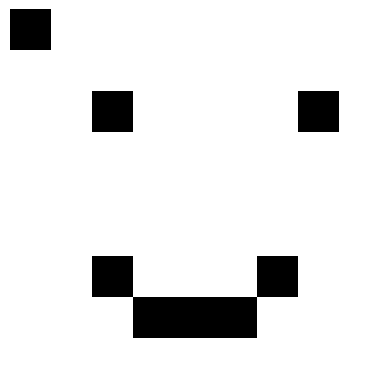

In [6]:
i = random.randint(0,95)
print(y_train[i])
plt.imshow(X_train[i], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 9]),
    keras.layers.Dense(25, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 81)                0         
                                                                 
 dense (Dense)               (None, 25)                2050      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,076
Trainable params: 2,076
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=100, verbose=0,)

TypeError: unhashable type: 'dict'

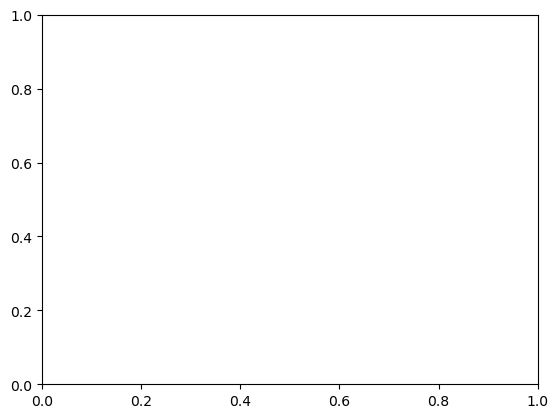

In [14]:
pd.DataFrame(history.history).plot()